# CNN to classify hand-written digits (MNIST) 

In [1]:
# imports
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


<Axes: >

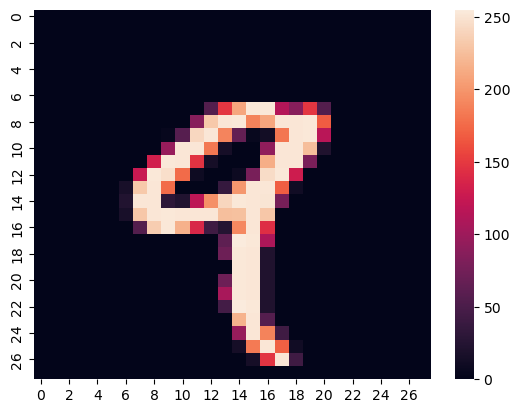

In [3]:
# visualize the data 
sns.heatmap(X_train[4])

In [4]:
y_train[4]

9

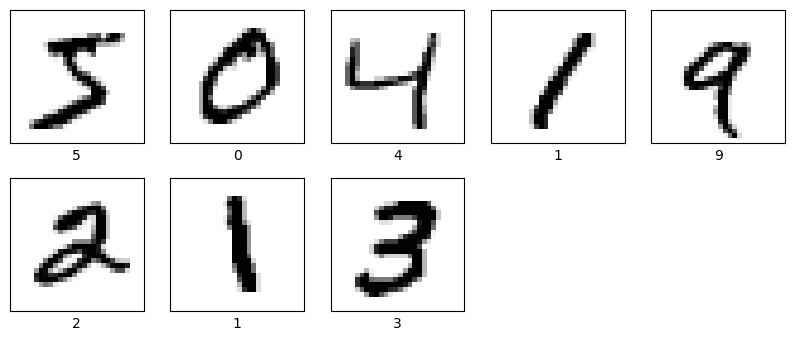

In [5]:
# visualizing the images

def plot_imgs(images, labels=None):
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()
    
plot_imgs(X_train[:8], y_train[:8])

In [6]:
# normalizing the data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# reshaping data
num_examples_X_train = X_train.shape[0]
num_examples_X_test = X_test.shape[0]
X_train = np.reshape(X_train, (num_examples_X_train, 28, 28, 1))
X_test = np.reshape(X_test,( num_examples_X_test, 28, 28, 1))

Creating the NN

In [8]:
# 1. Defining the structure of the CNN

cnn = keras.Sequential()

# lets do 3 convolutional layers. each layer will have a conv2d layer, batch normalization and an activation function (ReLU).

input_layer = keras.layers.InputLayer(input_shape = X_train[0].shape)
cnn.add(input_layer)

# first convolutional layer

conv1 = keras.layers.Conv2D(filters = 16, kernel_size=3)
batch1 = keras.layers.BatchNormalization()
relu1 = keras.layers.ReLU()

cnn.add(conv1)
cnn.add(batch1)
cnn.add(relu1)

# second convolutional layer

conv2 = keras.layers.Conv2D(filters = 32, kernel_size=3)
batch2 = keras.layers.BatchNormalization()
relu2 = keras.layers.ReLU()

cnn.add(conv2)
cnn.add(batch2)
cnn.add(relu2)


# third convolutional layer

conv3 = keras.layers.Conv2D(filters = 64, kernel_size=3)
batch3 = keras.layers.BatchNormalization()
relu3 = keras.layers.ReLU()

cnn.add(conv3)
cnn.add(batch3)
cnn.add(relu3)


# pooling layer

pooling_layer = keras.layers.GlobalAveragePooling2D()
cnn.add(pooling_layer)


# output layer (dense)

output = keras.layers.Dense(units = 10)
cnn.add(output)

cnn.summary()


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,394 (95.29 KB)

 Trainable params: 24,170 (94.41 KB)

 Non-trainable params: 224 (896.00 B)

Compile the model; def optimizer & loss function

In [9]:
cnn.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.1), loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

Train the model

In [10]:
num_epochs = 5
t0 = time.time()

history = cnn.fit(
    X_train,
    y_train,
    epochs = num_epochs,
)

t1 = time.time()

print('Elapsed time: %.2fs' % (t1-t0))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.6947 - loss: 0.8838
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9410 - loss: 0.1970
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9565 - loss: 0.1479
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9597 - loss: 0.1292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9668 - loss: 0.1087
Elapsed time: 199.78s


Evaluate the model's performance

In [11]:
loss, acc = cnn.evaluate(X_test, y_test)

print(f"Loss: {loss}, Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9393 - loss: 0.1889
Loss: 0.1594286561012268, Accuracy: 0.9531999826431274


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


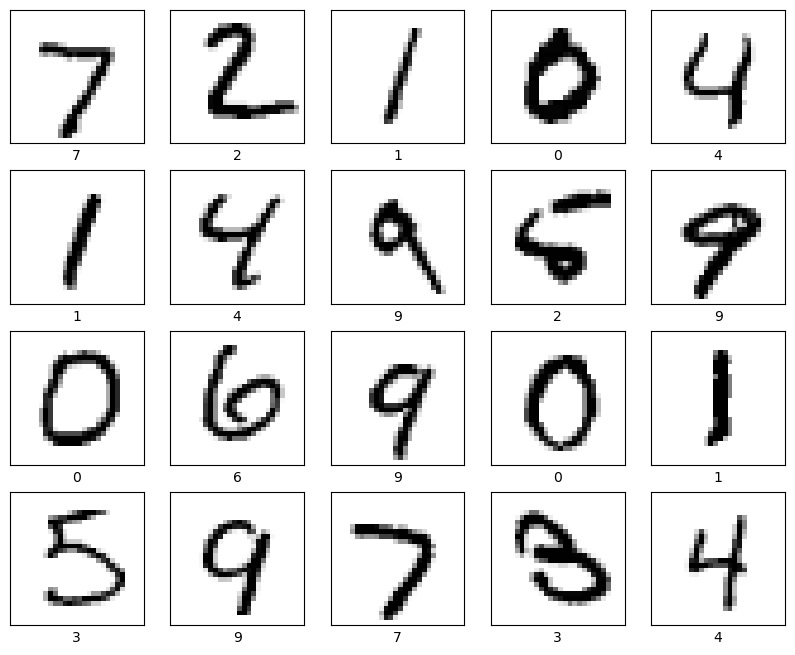

In [14]:
# Make predictions on the test set
logits = cnn.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
plot_imgs(X_test[:20], predictions[:20])